# <word2vec을 활용한 유사도분석>
### 목표: 유사도분석을 통해 국내주식종목 및 주식테마의 관련키워드를 살펴보자!
- 활용데이터: 네이버증권 종목별 뉴스데이터

## 데이터 수집

- 수집방법: 크롤링
- 활용툴: Scrapy

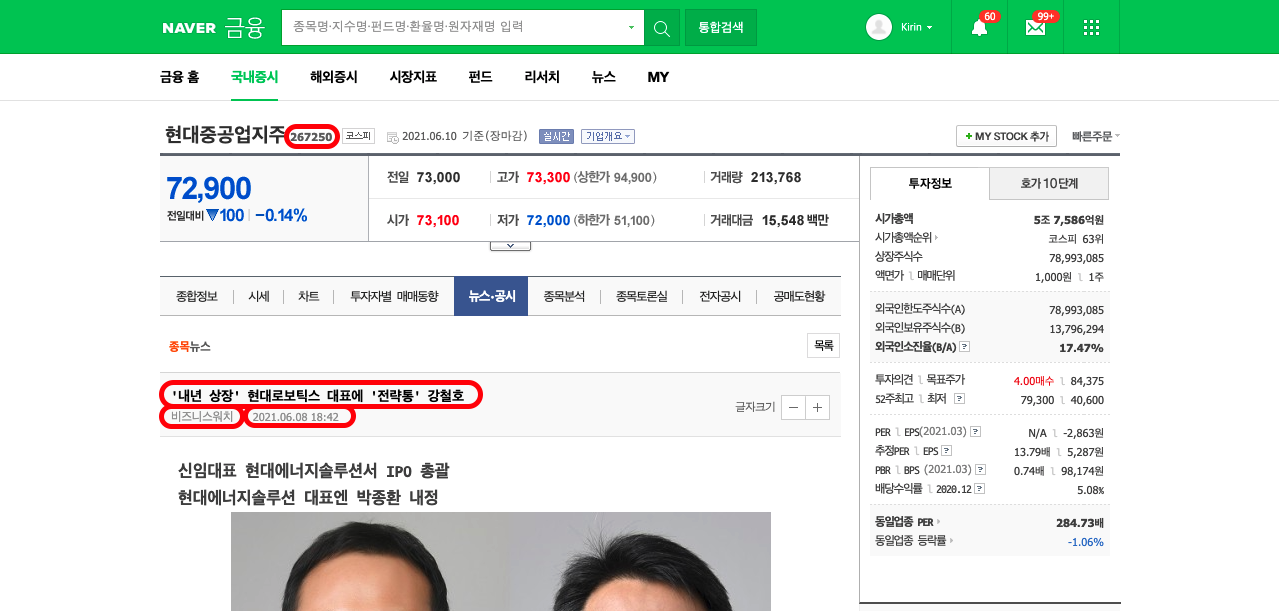

1. 주식뉴스 데이터: 네이버 증권 종목별 뉴스탭
- 주요컬럼: 종목코드/뉴스게시일/언론사/뉴스타이틀

In [40]:
import pandas as pd
import numpy as np

import gensim
from gensim.models import word2vec

In [41]:
news_df = pd.read_csv('./news_df.csv')

In [42]:
news_df

,Unnamed: 0,date,stock,stock_code,title,GoodBad
0,0,2021-06-30,COWON,56000,"거래소, COWON 제재금 미납 따른 가중벌점 부과",1.0
1,1,2021-06-30,CJ ENM,35760,"CJ ENM ""티빙, NAVER 대상 400억원 규모 3자배정 유상증자"" [주목 e공시]",1.0
2,2,2021-06-30,CJ ENM,35760,[코스닥 공시] CJ ENM,1.0
3,3,2021-06-30,CJ ENM,35760,CJ ENM-네이버 결속 강화…티빙 4백억 투자·해외진출도 돕는다,1.0
4,4,2021-06-30,BYC,1460,"BYC, 고윤성→김대환 대표이사로 변경",1.0
...,...,...,...,...,...,...
18743,18743,2021-08-29,현대글로비스,86280,"현대글로비스, 협력사와 ESG경영 속도",0.0
18744,18744,2021-08-29,현대차,5380,장재훈 현대차 사장 '글로벌 4대 모터쇼' 데뷔,0.0
18745,18745,2021-08-29,현대차,5380,"현대차, GV60에 통합 제어 OTA 적용...테슬라 넘는다",0.0
18746,18746,2021-08-29,효성,4800,리모델링 '시동' 건 당산 현대홈타운·효성,0.0


In [26]:
from konlpy.tag import Okt

tf = Okt()

In [52]:
# 정규표현식으로 필요없는 문자 제거
drop_text = '"[],.·→\''

for a in range(len(drop_text)):
  news_df['title'] = news_df['title'].str.replace(drop_text[a],"")

In [54]:
# 형태소 분해 및 조사, 어미, 접사 제거

result = []

for line in title_text:
  parts = tf.pos(line, norm=True, stem= True)
  a = []

  for word in parts:
    if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
      a.append(word[0])

  core = (" ".join(a)).strip()
  result.append(core)
  print(core)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
억 못 돌려주다 삼성 생명 즉시 연금 항소
램 가격 꺾다 삼 성전 자 하이닉스 동반 급락 이유
분기 안방 지키다 삼성 스마트폰
초대형 극 강 화질 삼성 형 출시
삼성 전자 사내 식당 곳 추가 입찰 지역 중 소 급식 업체 상생 강화
돌아오다 이재용 삼성 미국 투자 마지막 퍼즐 끼울다
사 조 산업 주주명부 열람 등사 가처분 신청 피소
주진우 사 조 산업 회장 지 분 쪼개다 소액 주주 룰 무력 화 편법
주진우 사 조 산업 회장 씩 주식 대여 소액 주주 분노
삼성 증권 한 온 시스템 전기차 시대 맞다 하반기 성장 기대
마켓 인사이트 삼성 증권 야간 공 모주 청약 실시
삼 표시 멘트 자회사 삼척 에너지 흡수 합병 결정
샘표 지르다 스위트 빠다 간장 쓰다 육포 출시
샘코 대다 감자 결정
성문 전자 억 규모 전환사채 발행
서호 전기 억 규모 공급 계약 체결
이 베스트 증권 올해 미술품 경매 시장 규모 억원 서울 옥션 주가 오르다 것
활황 기 접다 미술 경매 시장 서울 옥션 추가 상승 여력 크다
세원 앤 씨 건설 화공 플랜트 기기 추가 공급 계약 체결
셀트리온 허쥬마 일본 시장점유율 넘다
셀트리온 형제 동반 강세 렉 키로 나주 치료 대상 확대 기 대감
셀트리온 형제 코로나 치료 제 적용 대상 확대 신청 동반 상승
셀트리온 허쥬마 일본 시장 점유 율 돌파
세종 텔레콤 부산 은행 블록 체인 기반 디지털 자산 거래 플랫폼 협업
셀트리온 헬 스케 어 허쥬마 점유 율 돌파
스카이라이프 현저 저 평가 구간 목표 가신
스타 모빌리티 억 규모 전환사채 발행 결정
신세계 무인 결제 상용 화 그룹 사 투자 확대 수혜
신 영 증권 한예종 인재 육성 협약
신 영 증권 한국 예술 종합 학교 예술 인재 육성 협약 체결
신세계 이천시 첫 주거 브랜드 빌리브 어바인 시티
신세계 주거 브랜드 빌리브 어바인 시티 이 달 분양
신세계 건설 초고 층 주상 복합 빌리브 어바인 시티 이 달 분양
신세계 이천시 첫 주거 브랜드 빌리브 어바인 시티
용진

In [56]:
data_file = 'news_title.data'

In [57]:
# # 추출한 핵심 형태소파일 저장 
# with open(data_file, 'w', encoding='utf-8') as fp:
#   fp.write('\n'.join(result))

In [58]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)

In [59]:
# # 모델 저장
# model.save('news_title.model')

#### 비슷한 단어를 찾아보자

In [ ]:
# 코로나
model.wv.most_similar(positive=['코로나'])

[('19', 0.8813748955726624),
 ('매트릭스', 0.7768756151199341),
 ('억제', 0.7707164287567139),
 ('시약', 0.7655065059661865),
 ('피젠', 0.7614765167236328),
 ('페노피브레이트', 0.7598105072975159),
 ('자가진단', 0.7595705986022949),
 ('항원', 0.7563250660896301),
 ('항바이러스제', 0.7562327980995178),
 ('변', 0.7522547245025635)]

In [ ]:
# 반도체
model.wv.most_similar(positive=['반도체'])

[('파운드리', 0.6725121140480042),
 ('TSMC', 0.6564261317253113),
 ('장비', 0.6427514553070068),
 ('마이크론', 0.6386848092079163),
 ('비메', 0.6330597996711731),
 ('인텔', 0.6291726231575012),
 ('휘청', 0.6267282366752625),
 ('메모리', 0.6228733658790588),
 ('좌절', 0.6194837093353271),
 ('모리', 0.6186060905456543)]

In [67]:
model.wv.most_similar(positive=['삼성'],topn=30)

[('전자', 0.7102231979370117),
 ('150조', 0.6137644052505493),
 ('240조', 0.6058026552200317),
 ('모처럼', 0.6037290096282959),
 ('쩔쩔매다', 0.6029659509658813),
 ('외치다', 0.5977610349655151),
 ('좌절', 0.5970025062561035),
 ('8만', 0.595522403717041),
 ('TSMC', 0.5925612449645996),
 ('샌드위치', 0.591081976890564),
 ('답답하다', 0.589445948600769),
 ('전자로', 0.5874329805374146),
 ('사설', 0.5854265093803406),
 ('AMD', 0.5810791850090027),
 ('간만', 0.5790451169013977),
 ('이재용', 0.5787904262542725),
 ('전자에', 0.5770567655563354),
 ('6천억', 0.575322151184082),
 ('박신영', 0.5749056935310364),
 ('메모리', 0.5739172101020813),
 ('털썩', 0.5737431049346924),
 ('치이다', 0.5730141401290894),
 ('먹구름', 0.5717839002609253),
 ('필라델피아', 0.5716760158538818),
 ('횡보', 0.5714578628540039),
 ('7조', 0.5712737441062927),
 ('휘청', 0.5707764625549316),
 ('CLSA', 0.570193886756897),
 ('6000원', 0.5701171159744263),
 ('퍼지다', 0.5697808265686035),
 ('튀어', 0.5696231126785278),
 ('400만', 0.5688565969467163),
 ('치우다', 0.5683630108833313),
 ('분통', 0.566

In [70]:
# 워드클라우드로 만들어보자

# 폰트 지정
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)
from wordcloud import WordCloud

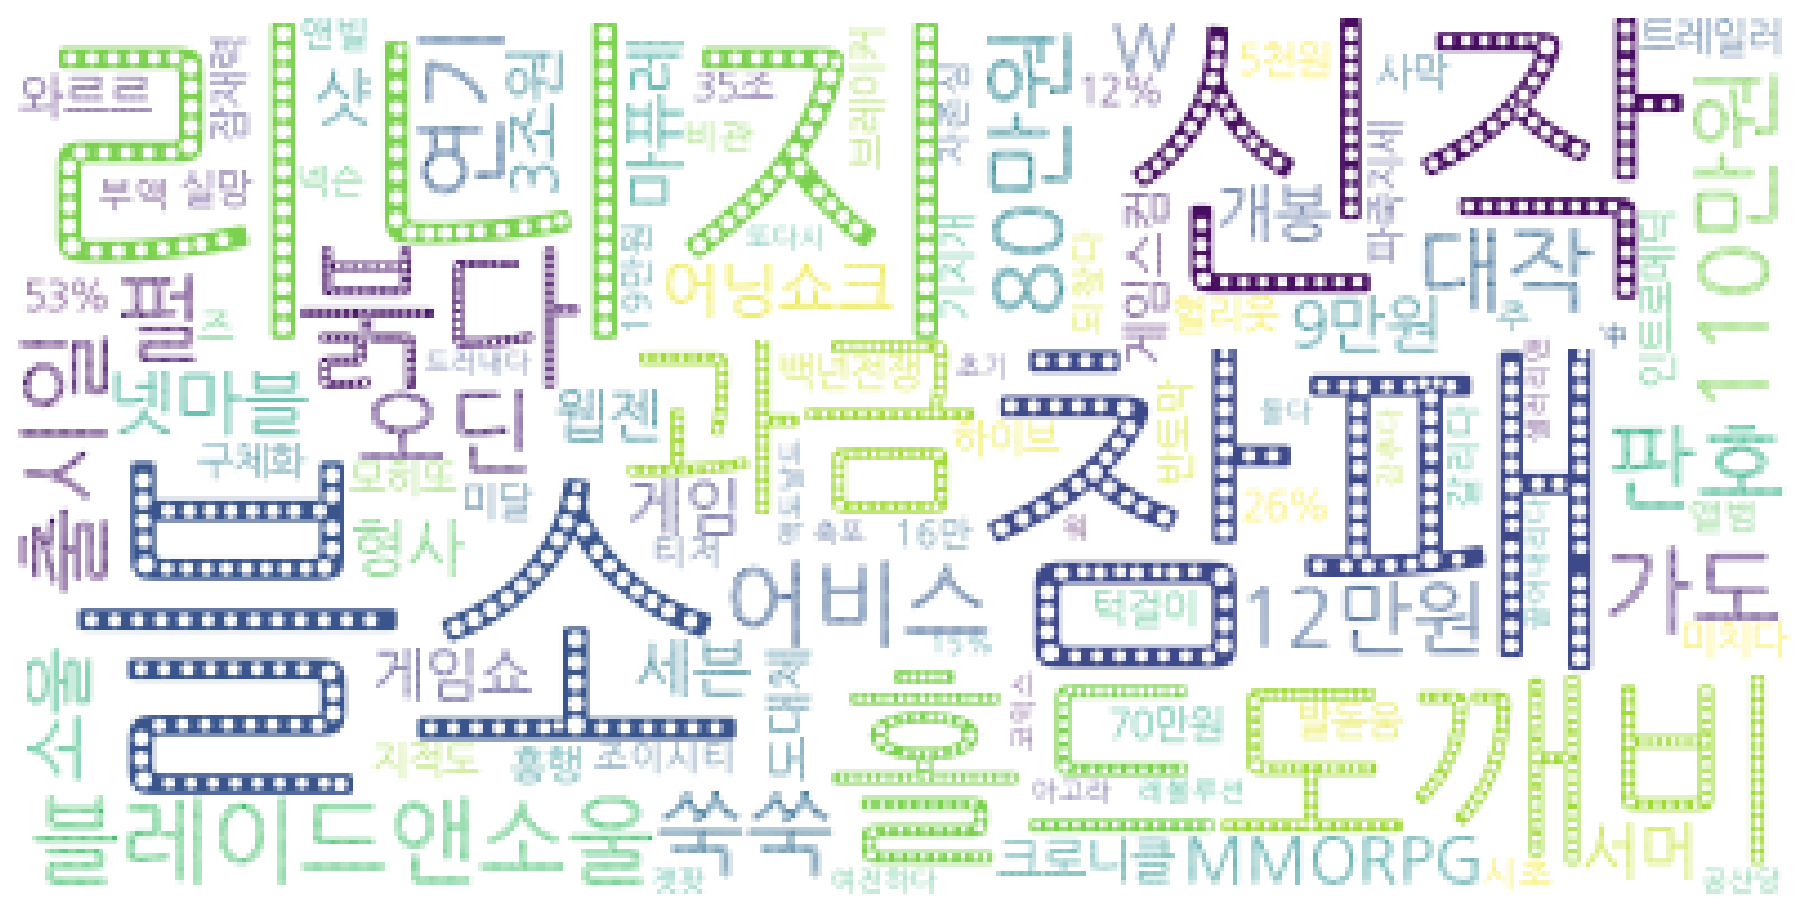

In [72]:
# 엔씨소프트

data = model.wv.most_similar(positive=['엔씨소프트'],topn=100)

cloud = WordCloud(font_path=path, relative_scaling=0.2,
                  background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,12))
plt.imshow(cloud)
plt.axis('off')
plt.show()